# Lesson 2b: Stochastic Gradient Descent (SGD)
SGD is an **optimization** method commonly used in neural networks.

In [1]:
%matplotlib inline

from fastai.basics import *

## Linear Regression Problem
The goal of linear regression is to fit a line to  a set of points.

In [2]:
n = 100

In [3]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1., 1)
x[:5]

tensor([[-0.8067,  1.0000],
        [ 0.7236,  1.0000],
        [-0.6830,  1.0000],
        [-0.7763,  1.0000],
        [-0.2678,  1.0000]])

In [4]:
a = tensor(3., 2)
print(a)

tensor([3., 2.])


In [5]:
y = x@a + torch.randn(n)

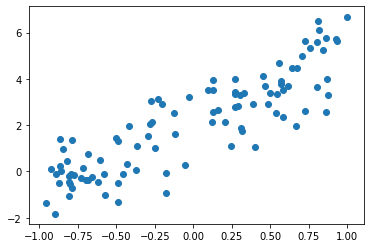

In [6]:
plt.scatter(x[:, 0], y);

You want to find **parameters** (weights) a such that you minimize the _error_ between the point and the line `x@a` (matrix product). Note that here **a** is unknown. For a regression problem the most common _error function_ is the **mean squared error**.

In [7]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

Suppose we believe **a = (-1.0, 1.0)** then we can compute `y_hat` which is our _prediction_ and then compute error.

In [8]:
a = tensor(-1., 1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(7.9582)

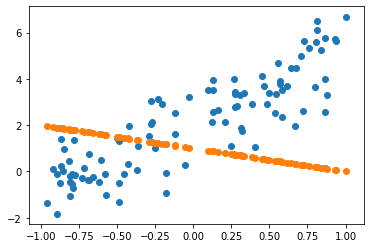

In [10]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

So far we have specified the _model_ (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle _optimization_ ; that is, how do we find the best values for **a**? How do we find the best _fitting_ linear regression.

## Gradient Descent
* An algorithm that minimizes functions.
* Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimizes the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

In [11]:
a = nn.Parameter(a)
print(a)

Parameter containing:
tensor([-1.,  1.], requires_grad=True)


In [12]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    
    if t % 10 == 0:
        print(loss)
    
    loss.backward()
        
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(n): update()

tensor(7.9582, grad_fn=<MeanBackward0>)
tensor(2.3393, grad_fn=<MeanBackward0>)
tensor(1.3290, grad_fn=<MeanBackward0>)
tensor(1.1123, grad_fn=<MeanBackward0>)
tensor(1.0653, grad_fn=<MeanBackward0>)
tensor(1.0551, grad_fn=<MeanBackward0>)
tensor(1.0529, grad_fn=<MeanBackward0>)
tensor(1.0524, grad_fn=<MeanBackward0>)
tensor(1.0523, grad_fn=<MeanBackward0>)
tensor(1.0523, grad_fn=<MeanBackward0>)


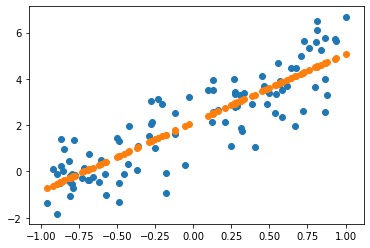

In [14]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@a);

## Animate it!

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1., 1.))

fig = plt.figure()
plt.scatter(x[:, 0], y, c='orange')
line, = plt.plot(x[:, 0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, n), interval=20)

In practice, we don't calculate in the whole file at once, u but we use _mini-batches_

## Vocab
* learning rate
* eposch
* mini-batch
* SGD
* Model / Architecture
* parameters
* loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident prediction, and correct unconfident predictions.